In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('IPL2016.csv')
X = df[['overall_sr']].values
y = df['won'].values
df.head()

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0


In [8]:
model = LogisticRegression()
model.fit(X, y)
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

In [9]:
def predict_probability(strike_rate):
    logit = intercept + coefficient * strike_rate
    return 1 / (1 + np.exp(-logit))

X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

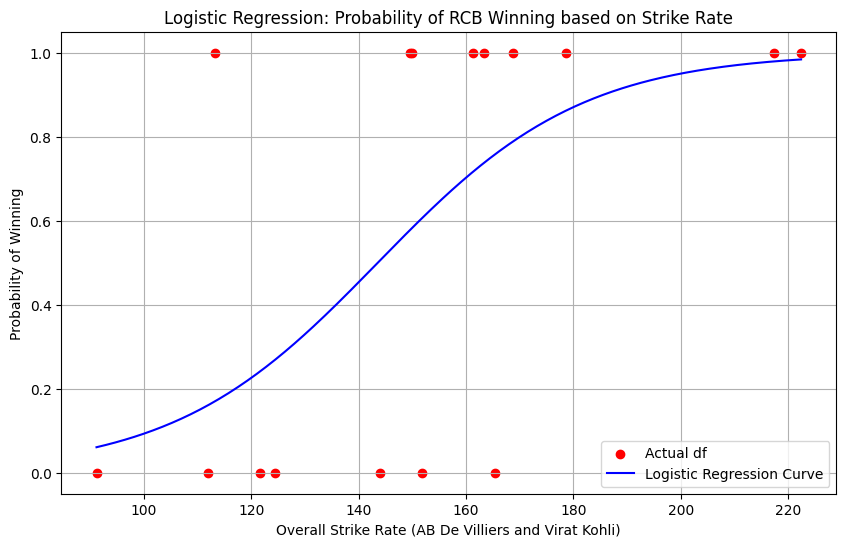

In [10]:


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual df')
plt.plot(X_test, y_prob, color='blue', label='Logistic Regression Curve')
plt.xlabel('Overall Strike Rate (AB De Villiers and Virat Kohli)')
plt.ylabel('Probability of Winning')
plt.title('Logistic Regression: Probability of RCB Winning based on Strike Rate')
plt.legend()
plt.grid(True)
plt.show()




In [11]:
print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")

example_strike_rate = 200
predicted_probability = predict_probability(example_strike_rate)
print(f"The predicted probability of winning for a strike rate of {example_strike_rate} is {predicted_probability:.2f}")

Intercept: -7.505103426433887
Coefficient: 0.052272947287107636
The predicted probability of winning for a strike rate of 200 is 0.95
